# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/0z/gp51c2ln7l595qj_bjp3g4y00000gn/T/ipykernel_16536/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe


#Drop NaN in target variable
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [4]:
len(df['YEAR'].unique())


14

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:

x = df.where(df['STATE']=='OHIO')
x.dropna(subset = ['STATE'], inplace = True)
OH_4RScores = np.mean(x['AVG_READING_4_SCORE'])


x = df.where(df['STATE']=='MICHIGAN')
x.dropna(subset = ['STATE'], inplace = True)
MI_4RScores = np.mean(x['AVG_READING_4_SCORE'])

if MI_4RScores > OH_4RScores:
    print("Michigan has the higher average.")
else:
    print("Ohio (Booooo) has the higher average.")

Ohio (Booooo) has the higher average.


Find the average for your chosen test across all states in 2019

In [6]:
x = df.where(df['YEAR'] == 2019)
x.dropna(subset = ['YEAR'], inplace = True)
ave2019 = np.mean(x['AVG_READING_4_SCORE'])
ave2019

219.79245283018867

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
s = df.groupby('STATE')['AVG_READING_4_SCORE'].max()
s

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
df = pd.read_csv('../data/states_edu.csv')
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe

df['ESTIMATED_MATH_12_SCORE'] = df['AVG_MATH_8_SCORE'] + (df['AVG_MATH_8_SCORE']-df['AVG_MATH_4_SCORE'])
df['ESTIMATED_READING_12_SCORE'] = df['AVG_READING_8_SCORE'] + (df['AVG_READING_8_SCORE']-df['AVG_READING_4_SCORE'])

list(df)

['PRIMARY_KEY',
 'STATE',
 'YEAR',
 'ENROLL_ALL_EST',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'ENROLL_PREK',
 'ENROLL_KINDER',
 'ENROLL_4',
 'ENROLL_8',
 'ENROLL_12',
 'ENROLL_PRIMARY',
 'ENROLL_HS',
 'ENROLL_ALL',
 'AVG_MATH_4_SCORE',
 'AVG_MATH_8_SCORE',
 'AVG_READING_4_SCORE',
 'AVG_READING_8_SCORE',
 'ESTIMATED_MATH_12_SCORE',
 'ESTIMATED_READING_12_SCORE']

Feature engineering justification: **ESTIMATED_MATH_12_SCORE is what their estimated score in math would be in grade 12. ESTIMATED_READING_12_SCORE is what their estimated score in reading would be in grade 12.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

PearsonRResult(statistic=0.7721807682271906, pvalue=2.7441066850212605e-104)

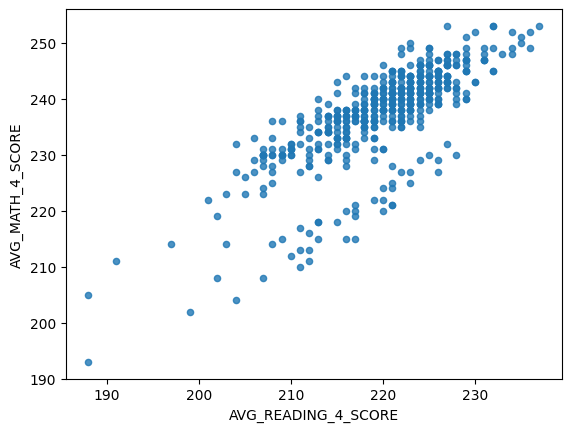

In [9]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.8)

df1=pd.DataFrame({"reading":df['AVG_READING_4_SCORE'],
               "math":df['AVG_MATH_4_SCORE']})
df1.dropna(inplace = True)
import scipy.stats as stats
stats.pearsonr(df1["reading"],df1["math"])


Based on the visualization in the tutorial, I predicted that the math score would be correlated with the reading score . As you can see in the visualization, the two appear to be related.

**Visualization 2**

<Axes: xlabel='AVG_READING_4_SCORE', ylabel='AVG_READING_8_SCORE'>

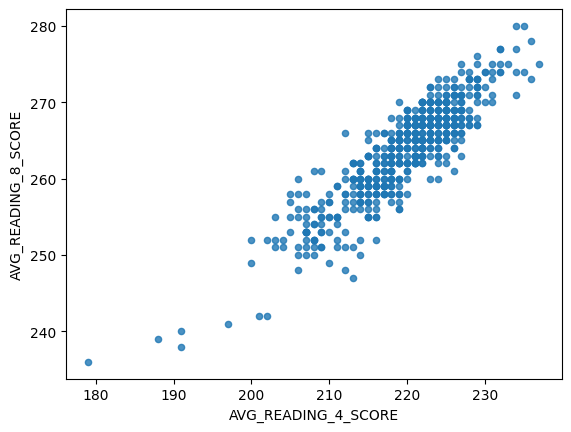

In [10]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_READING_8_SCORE', alpha=0.8)

Again, based on the visualization in the tutorial, I predicted that the reading score in grade 8 would be correlated with the reading score. As you can see in the visualization, the two appear to be highly related.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['AVG_READING_8_SCORE','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)


In [13]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [18]:
print("intercept: ",model.intercept_)
print("coefficient for the average reading score of eigth graders: ",model.coef_[0])
print("coefficient for the average math score of fourth graders: ",model.coef_[1])
print("score: ",model.score(X_test, y_test))
print("mean error: ",np.mean(model.predict(X_test)-y_test))
print("absolute mean error: ",np.mean(np.abs(model.predict(X_test)-y_test)))
print("root mean squared error", np.mean((model.predict(X_test)-y_test)**2)**0.5)
x=model.coef_


intercept:  -36.82734378331793
coefficient for the average reading score of eigth graders:  0.5776962856161748
coefficient for the average math score of fourth graders:  0.43761893463241097
score:  0.8713213135870761
mean error:  0.12251472782812042
absolute mean error:  1.8827896169418514
root mean squared error 2.398572978489488


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.


Text(0.5, 1.0, 'Model Behavior On Training Set')

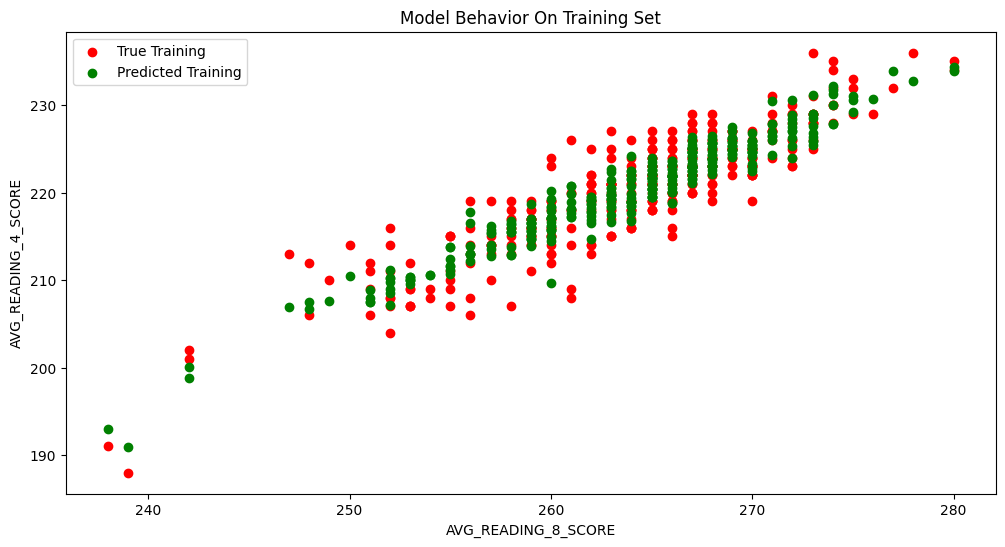

In [19]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

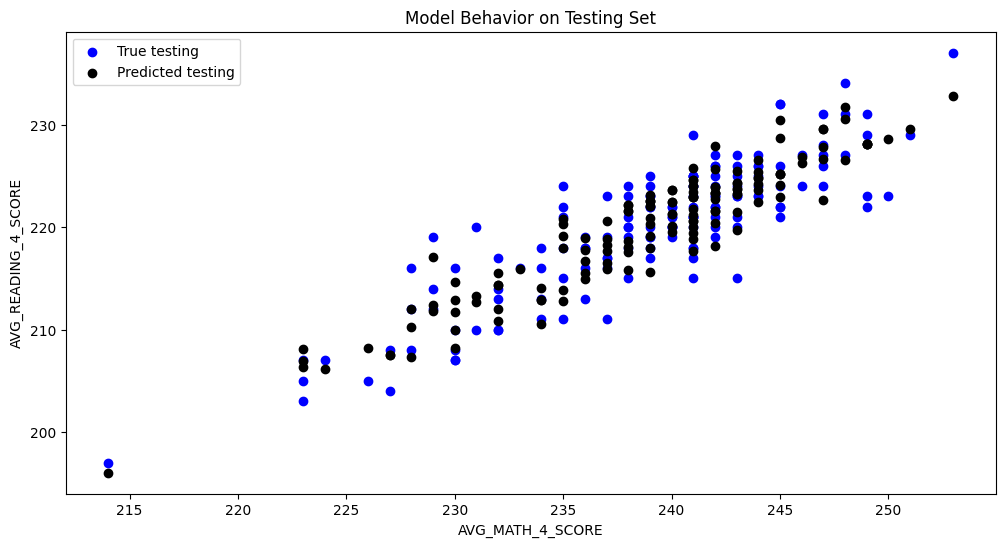

In [20]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I preformed a regressional analysis on fourth grade NAEP reading scores as predicted by eigth grade NAEP reading scores and fourth grade NAEP math scores. I chose these variables based on my exploratory data analysis; both of these had clearly defined trends, while other variables, such as number of students in fourth grade, revenue, and spending in a variety of categories did not show the same trends (not shown here). The regressional analysis preformed  well on all tests. The R^2 was greater than .7, and all the measures for error were relatively small. 